In [65]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [66]:
train = pd.read_csv('Train_Data.csv')

In [67]:
train.tail()

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [69]:
train.corr()

,age,bmi,children,charges
age,1.000000,0.143527,-0.061076,0.299692
bmi,0.143527,1.000000,-0.041996,0.211325
children,-0.061076,-0.041996,1.000000,-0.075089
charges,0.299692,0.211325,-0.075089,1.000000


In [70]:
target = 'charges'

x = train[['age','bmi']]
y = train[target]

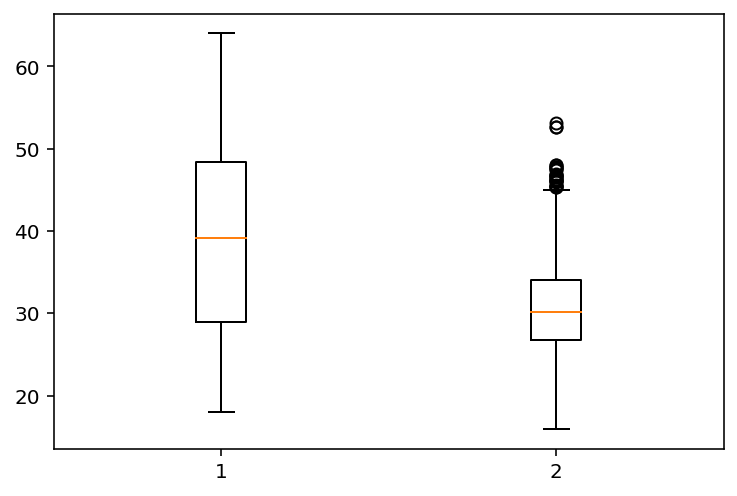

In [71]:
plt.boxplot(x)
plt.show()

In [72]:
x = (x - x.min()) / (x.max() - x.min())

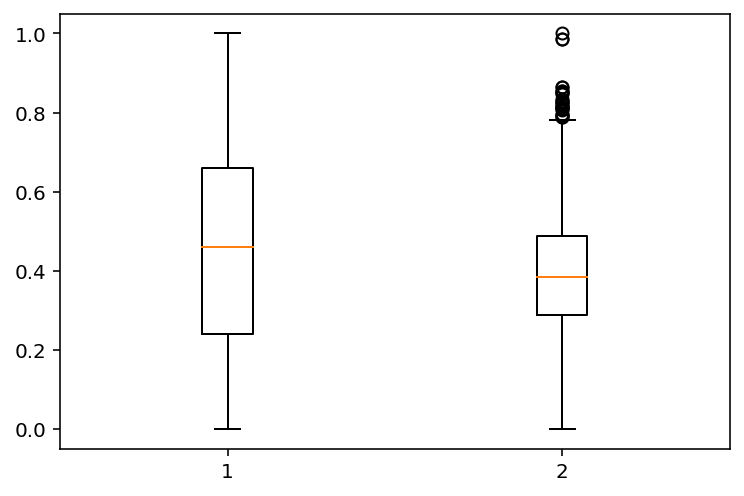

In [73]:
plt.boxplot(x)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(random_state=2022)

cv_score = cross_val_score(model, x_train, y_train, cv=10)

print(cv_score)
print(cv_score.mean())

result = {}
result['DecisionTreeRegressor'] = cv_score.mean()

[-0.36158565 -0.01501443 -0.21567386 -0.06643544 -0.16925972 -0.48215666
 -0.14173671 -0.17164158 -0.2330101  -0.21167015]
-0.2068184286202534


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_score = cross_val_score(model, x_train, y_train, cv=10)

print(cv_score)
print(cv_score.mean())

result['LinearRegression'] = cv_score.mean()

[0.02000965 0.14105087 0.14887232 0.09370713 0.13925962 0.12471807
 0.14493137 0.13197382 0.08829499 0.1080503 ]
0.11408681405740846


In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

model = KNeighborsRegressor()

cv_score = cross_val_score(model, x_train, y_train, cv=10)

print(cv_score)
print(cv_score.mean())

result['KNeighborsRegressor'] = cv_score.mean()

[-0.09491136  0.1952867   0.09981537  0.05551768  0.16929672  0.07306618
  0.10029292  0.0530873   0.17338216  0.08728958]
0.09121232574023987


In [78]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

model = SVR()

cv_score = cross_val_score(model, x_train, y_train, cv=10)

print(cv_score)
print(cv_score.mean())

result['SVR'] = cv_score.mean()

[-0.0557799  -0.06176212 -0.10339316 -0.10774841 -0.09948345 -0.12940278
 -0.07576276 -0.10407062 -0.1180099  -0.0793431 ]
-0.09347562200752739


In [79]:
result

{'DecisionTreeRegressor': -0.2068184286202534,
 'LinearRegression': 0.11408681405740846,
 'KNeighborsRegressor': 0.09121232574023987,
 'SVR': -0.09347562200752739}

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

7698.280911346941
0.1144031893026013
